 # 10. Gradient Descent with Mini-Batch Size

### 0. IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
import random
import math
import numpy as np

### 1. READING THE DATA

In [2]:
bank_set = pd.read_csv('bank.csv', sep=';')

In [3]:
bank_set

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [12]:
bank_set['job'].replace({'unemployed':1},inplace=True)

The bank data has 4521 samples and 17 values.

### 2. CONVERTING NON-NUMERIC VALUES 

In this part, we will convert any non-numeric values into the numeric values. For doing this, first, I would find which values are non numeric and I will convert by manually.

In [13]:
bank_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


According to the info, job ,marital, education,default,housing,loan,contact,month,poutcome and y vlaues are object. 

#### 2.1 Converting the 'job' Column

In [14]:
set(list(bank_set['job']))

{1,
 'admin.',
 'blue-collar',
 'entrepreneur',
 'housemaid',
 'management',
 'retired',
 'self-employed',
 'services',
 'student',
 'technician',
 'unknown'}

In [15]:
bank_set['job'].replace({'admin.':0, 'blue-collar':1  , 'entrepreneur':2, 
                        'housemaid':3, 'management':4, 'retired':5 ,'self-employed':6
                       ,'services':7, 'services':8 , 'student':9 , 'technician':10
                       , 'unemployed':11, 'unknown':12}, inplace = True)

#### 2.2 Converting the 'marital' Columns

In [16]:
set(list(bank_set['marital']))

{'divorced', 'married', 'single'}

In [17]:
bank_set['marital'].replace({'divorced':0 , 'married':1,'single':2}, inplace=True)

#### 2.3 Converting the 'education' Columns

In [18]:
set(list(bank_set['education']))

{'primary', 'secondary', 'tertiary', 'unknown'}

In [19]:
bank_set['education'].replace({'primary':0, 'secondary':1 , 'tertiary':2 , 'unknown':3}, inplace=True)

#### 2.4 Converting the 'default' Column

In [20]:
set(list(bank_set['default']))

{'no', 'yes'}

In [21]:
bank_set['default'].replace({'no':0 , 'yes':1}, inplace = True)

#### 2.5 Converting the 'Housing'   Column 

In [22]:
set(list(bank_set['housing']))

{'no', 'yes'}

In [23]:
bank_set['housing'].replace({'no':0 , 'yes':1}, inplace = True)

#### 2.6 Converting the 'loan' Column

In [24]:
set(list(bank_set['loan']))

{'no', 'yes'}

In [25]:
bank_set['loan'].replace({'no':0 , 'yes':1}, inplace = True)

#### 2.7 Converting the 'Contact' Column

In [26]:
set(list(bank_set['contact']))

{'cellular', 'telephone', 'unknown'}

In [27]:
bank_set['contact'].replace({'cellular':0, 'telephone':1 , 'unknown':2}, inplace=True)

#### 2.8 Converting the 'month' Column

In [28]:
set(list(bank_set['month']))

{'apr',
 'aug',
 'dec',
 'feb',
 'jan',
 'jul',
 'jun',
 'mar',
 'may',
 'nov',
 'oct',
 'sep'}

In [29]:
bank_set['month'].replace({'jan':0 , 'feb':1 , 'mar':2 , 'apr':3 , 'may':4,
                           'jun':5 , 'jul':6 , 'aug':7 , 'sep':8 , 'oct':9,
                           'nov':10, 'dec':11}, inplace = True)

#### 2.9 Converting 'poutcom' Column

In [30]:
set(list(bank_set['poutcome']))

{'failure', 'other', 'success', 'unknown'}

In [31]:
bank_set['poutcome'].replace({'failure':0 , 'other':1 , 'success':2 , 'unknown':3}, inplace=True)

#### 2.10 Converting 'y' Column

In [32]:
set(list(bank_set['y']))

{'no', 'yes'}

In [33]:
bank_set['y'].replace({'no':0 , 'yes':1}, inplace = True)

#### 2.11 Final Data Set

In [34]:
bank_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        4521 non-null   int64
 1   job        4521 non-null   int64
 2   marital    4521 non-null   int64
 3   education  4521 non-null   int64
 4   default    4521 non-null   int64
 5   balance    4521 non-null   int64
 6   housing    4521 non-null   int64
 7   loan       4521 non-null   int64
 8   contact    4521 non-null   int64
 9   day        4521 non-null   int64
 10  month      4521 non-null   int64
 11  duration   4521 non-null   int64
 12  campaign   4521 non-null   int64
 13  pdays      4521 non-null   int64
 14  previous   4521 non-null   int64
 15  poutcome   4521 non-null   int64
 16  y          4521 non-null   int64
dtypes: int64(17)
memory usage: 600.6 KB


In [35]:
bank_set

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,1,1,0,0,1787,0,0,0,19,9,79,1,-1,0,3,0
1,33,8,1,1,0,4789,1,1,0,11,4,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,3,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,5,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,4,226,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,8,1,1,0,-333,1,0,0,30,6,329,5,-1,0,3,0
4517,57,6,1,2,1,-3313,1,1,2,9,4,153,1,-1,0,3,0
4518,57,10,1,1,0,295,0,0,0,19,7,151,11,-1,0,3,0
4519,28,1,1,1,0,1137,0,0,0,6,1,129,4,211,3,1,0


### 3. EXISTING OF MISSING VALUES

Now, we will use .info() function the know whether data set has NaN values or not.

In [36]:
bank_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        4521 non-null   int64
 1   job        4521 non-null   int64
 2   marital    4521 non-null   int64
 3   education  4521 non-null   int64
 4   default    4521 non-null   int64
 5   balance    4521 non-null   int64
 6   housing    4521 non-null   int64
 7   loan       4521 non-null   int64
 8   contact    4521 non-null   int64
 9   day        4521 non-null   int64
 10  month      4521 non-null   int64
 11  duration   4521 non-null   int64
 12  campaign   4521 non-null   int64
 13  pdays      4521 non-null   int64
 14  previous   4521 non-null   int64
 15  poutcome   4521 non-null   int64
 16  y          4521 non-null   int64
dtypes: int64(17)
memory usage: 600.6 KB


According to the info, there is no any NaN values in the data. For this reason, no need to drop any columns.

### 4. NORMALIZING THE DATA

####  4. 1 Mean and Standard Deviation of The Data

In [37]:
mu = np.array(bank_set).mean()

In [38]:
sigma = np.std(np.array(bank_set))

In [39]:
print('Mean of The Data =', mu)
print('Standart Deviation of The Data =', sigma)

Mean of The Data = 106.05065251050652
Standart Deviation of The Data = 805.8497617924002


####  4.2 Normalize The Data

In [40]:
dimension_one = int(bank_set.shape[0])
dimension_two = int(bank_set.shape[1])
bank_set_matrix = np.array(bank_set, dtype='f')
for i in range(0,dimension_one):
    for j in range(0,dimension_two):
        bank_set_matrix[i][j]=(bank_set_matrix[i][j]-mu)/sigma
        

In [41]:
a = (np.array(bank_set)[0][0]-mu)/sigma

In [42]:
bank_set_normalized= pd.DataFrame(bank_set_matrix)

### 5. CREATING TRAIN and TEST SET

#### 5.1 Defining a Function to Create Train and Test Set

In [35]:
def train_test_set(data,train_ratio):
    train_set =[]
    test_set=[]
    all_number_of_samples=int(data.shape[0])
    train_number_of_samples = math.floor(all_number_of_samples*train_ratio)
    places_of_train_samples =random.sample(range(0,all_number_of_samples),train_number_of_samples)
    for i in range(0,all_number_of_samples):
        if i in places_of_train_samples:
            train_set.append(data.iloc[i])
        else:
            test_set.append(data.iloc[i])
    return train_set,test_set
        
    

#### 5.2 Train and Test Sets

In [36]:
train_set_bank , test_set_bank = train_test_set(bank_set_normalized,0.8)

In [37]:
pd.DataFrame(train_set_bank)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.094373,-0.130360,-0.130360,-0.131601,-0.131601,2.085934,-0.131601,-0.131601,-0.131601,-0.108023,-0.120433,-0.033568,-0.130360,-0.132842,-0.131601,-0.127878,-0.131601
1,-0.090650,-0.121674,-0.130360,-0.130360,-0.131601,5.811194,-0.130360,-0.130360,-0.131601,-0.117951,-0.126637,0.141403,-0.130360,0.289073,-0.126637,-0.131601,-0.131601
2,-0.088169,-0.126637,-0.129119,-0.129119,-0.131601,1.543649,-0.130360,-0.131601,-0.131601,-0.111746,-0.127878,0.097970,-0.130360,0.277905,-0.130360,-0.131601,-0.131601
3,-0.094373,-0.126637,-0.130360,-0.129119,-0.131601,1.700006,-0.130360,-0.130360,-0.129119,-0.127878,-0.125396,0.115343,-0.126637,-0.132842,-0.131601,-0.127878,-0.131601
4,-0.058386,-0.130360,-0.130360,-0.130360,-0.131601,-0.131601,-0.130360,-0.131601,-0.129119,-0.125396,-0.126637,0.148848,-0.130360,-0.132842,-0.131601,-0.127878,-0.131601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,-0.091891,-0.121674,-0.129119,-0.130360,-0.131601,0.455357,-0.130360,-0.131601,-0.131601,-0.122915,-0.124155,0.642737,-0.125396,-0.132842,-0.131601,-0.127878,-0.131601
4516,-0.090650,-0.121674,-0.130360,-0.130360,-0.131601,-0.544829,-0.130360,-0.131601,-0.131601,-0.094373,-0.124155,0.276664,-0.125396,-0.132842,-0.131601,-0.127878,-0.131601
4518,-0.060868,-0.119192,-0.130360,-0.130360,-0.131601,0.234472,-0.131601,-0.131601,-0.131601,-0.108023,-0.122915,0.055779,-0.117951,-0.132842,-0.131601,-0.127878,-0.131601
4519,-0.096855,-0.130360,-0.130360,-0.130360,-0.131601,1.279332,-0.131601,-0.131601,-0.131601,-0.124155,-0.130360,0.028478,-0.126637,0.130234,-0.127878,-0.130360,-0.131601


In [38]:
pd.DataFrame(test_set_bank)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
6,-0.086928,-0.124155,-0.130360,-0.129119,-0.131601,0.249363,-0.130360,-0.131601,-0.131601,-0.114228,-0.126637,0.291555,-0.130360,0.277905,-0.129119,-0.130360,-0.131601
9,-0.078241,-0.121674,-0.130360,-0.131601,-0.131601,-0.240803,-0.130360,-0.130360,-0.131601,-0.110505,-0.127878,0.256809,-0.130360,0.050815,-0.129119,-0.131601,-0.131601
27,-0.048459,-0.125396,-0.130360,-0.127878,-0.131601,0.732084,-0.131601,-0.131601,-0.130360,-0.110505,-0.122915,0.016069,-0.130360,-0.001304,-0.129119,-0.131601,-0.131601
28,-0.062109,-0.124155,-0.130360,-0.130360,-0.131601,0.841285,-0.131601,-0.130360,-0.131601,-0.094373,-0.124155,0.053297,-0.129119,-0.132842,-0.131601,-0.127878,-0.131601
31,-0.093132,-0.119192,-0.130360,-0.130360,-0.131601,0.080597,-0.131601,-0.131601,-0.131601,-0.098096,-0.122915,-0.031086,-0.127878,-0.132842,-0.131601,-0.127878,-0.131601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4507,-0.090650,-0.121674,-0.130360,-0.130360,-0.131601,0.225786,-0.130360,-0.131601,-0.131601,-0.110505,-0.127878,0.248122,-0.130360,-0.132842,-0.131601,-0.127878,-0.131601
4508,-0.079482,-0.131601,-0.130360,-0.127878,-0.131601,0.665074,-0.130360,-0.130360,-0.129119,-0.111746,-0.126637,0.500030,-0.129119,-0.132842,-0.131601,-0.127878,-0.131601
4509,-0.068314,-0.119192,-0.130360,-0.129119,-0.131601,2.978160,-0.131601,-0.131601,-0.131601,-0.094373,-0.119192,0.128993,-0.127878,-0.132842,-0.131601,-0.127878,-0.131601
4510,-0.086928,-0.119192,-0.131601,-0.130360,-0.131601,0.570763,-0.130360,-0.131601,-0.129119,-0.106783,-0.126637,0.028478,-0.129119,-0.132842,-0.131601,-0.127878,-0.131601


#### 5.3 X Matris  and Y Vector Of Train Set

In [39]:
x_train = np.array(train_set_bank)[:,:16]
y_train =np.array(train_set_bank)[:,16:]

In [40]:
print(x_train.shape)
print(y_train.shape)

(3616, 16)
(3616, 1)


#### 5.4 X Matris  and Y Vector Of Test Set

In [41]:
x_test = np.array(test_set_bank)[:,:16]
y_test =np.array(test_set_bank)[:,16:]

In [42]:
print(x_test.shape)
print(y_test.shape)

(905, 16)
(905, 1)


In [43]:
x_train

array([[-0.09437324, -0.1303601 , -0.1303601 , ..., -0.13284194,
        -0.13160102, -0.12787825],
       [-0.09065046, -0.12167361, -0.1303601 , ...,  0.28907293,
        -0.12663732, -0.13160102],
       [-0.08816861, -0.12663732, -0.12911917, ...,  0.2779046 ,
        -0.1303601 , -0.13160102],
       ...,
       [-0.06086823, -0.11919176, -0.1303601 , ..., -0.13284194,
        -0.13160102, -0.12787825],
       [-0.09685509, -0.1303601 , -0.1303601 , ...,  0.13023439,
        -0.12787825, -0.1303601 ],
       [-0.07700028, -0.12911917, -0.12911917, ...,  0.17738958,
        -0.12291454, -0.1303601 ]], dtype=float32)

### 6.  LOGISTIC REGRESSION  with MINI-BATCH GRADIENT ASCENT

### 6.1 Defining The Functions

#### 6.1.0 Logistic Function

In [44]:
def logistic_function(x,beta):
    return 1/(1+np.exp(x.T@beta))

#### 6.1.1 Loglikelihood Loss Function

In [45]:
def loglikelihood(x,y,beta):
    dim_one= int(x.shape[0])
    dim_two= int(x.shape[1])
    loss = 0
    for i in range(0,dim_one):
        loss= float(loss + y[i]*((x[i].reshape((dim_two,1))).T@beta) - np.log(1  + (np.exp(x[i].reshape((dim_two,1))).T @beta)))
    return loss
    

#### 6.1.2 Gradient Ascent For Logistic Regression

In [46]:
#defining the gradienc ascent function for logistic regression
def gradient_ascent_lr(x,y,beta,mu,i_max):
    loss = []
    dimension=int(y.shape[0])
    diemnsion_two=int(x.shape[1])
    
    
    for k in range(0,i_max):
        y_prediction = np.zeros((dimension,1))
        for j in range(0,dimension):
            y_prediction[j] = logistic_function(x[j].reshape((16,1)),beta)
        
        beta_new = beta + mu* x.T@(y-y_prediction)
        loss.append(loglikelihood(x,y,beta_new))
        beta = beta_new
    return loss
    
    
    

In [47]:
#applying the gradient ascent function to the train set
b= np.ones((16,1))
error_one= gradient_ascent_lr(x_train,y_train,b,0.000001,300)

In [48]:
import matplotlib.pyplot as plt

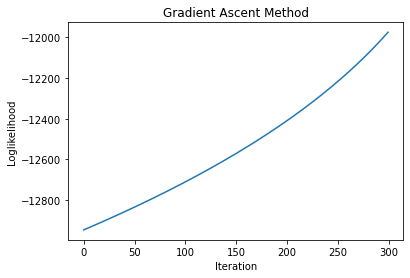

In [49]:
plt.plot(error_one)
plt.xlabel('Iteration')
plt.ylabel('Loglikelihood')
plt.title('Gradient Ascent Method')
plt.show()

#### 6.1.3 Gradient Ascent With Mini-Batch  Size

In [50]:
def mini_batch_ga_lr(x,y,beta,batch_size,mu, i_max):
    dim_one = int(x.shape[0])
    dim_two = int(x.shape[1])
    loss =[]
    epoch_number = math.floor(dim_one/batch_size)
    for i in range(0,i_max):  
        for j in range(0,epoch_number-1):
            y_prediction = np.zeros((dim_one,1))
            for k in range(0,dim_one):
                y_prediction[k]=logistic_function(x[k].reshape((dim_two,1)),beta)
            value_one = (x[j*batch_size:(j+1)*batch_size]).T
            value_two = (y[j*batch_size:(j+1)*batch_size]-y_prediction[j*batch_size:(j+1)*batch_size])
            beta_new = beta + mu*value_one@value_two
            loss.append(loglikelihood(x,y,beta_new))
            beta =beta_new
               
        y_prediction = np.zeros((dim_one,1))
        for k in range(0,dim_one):
                y_prediction[k]=logistic_function(x[k].reshape((dim_two,1)),beta)
                
        beta_lost = beta + mu*x[(epoch_number)*batch_size:dim_one].T@(y[(epoch_number)*batch_size:dim_one]- y_prediction[(epoch_number)*batch_size:dim_one])
        loss.append(loglikelihood(x,y,beta_lost))
        beta = beta_lost
 
    return loss
    
    

In [51]:
errors_mini = mini_batch_ga_lr(x_train,y_train,b,500,0.000001,10)

Text(0, 0.5, 'Loglikelihood')

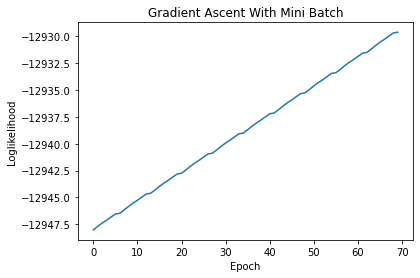

In [52]:
plt.plot(errors_mini)
plt.title('Gradient Ascent With Mini Batch')
plt.xlabel('Epoch')
plt.ylabel('Loglikelihood')